In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import sys

import udacityhelpers as udacity
from lanelines import *

In [3]:
CODE_DIR = os.environ['CODEROOT']
sys.path.append(os.path.join(CODE_DIR, 'EPypes'))

In [4]:
import lanespipeline 

from epypes.compgraph import CompGraph, CompGraphRunner
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


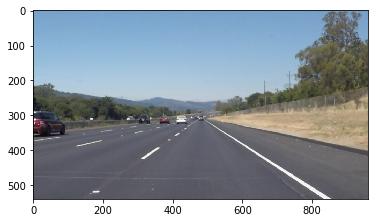

In [5]:
image = mpimg.imread('carnd_lanelines_images/solidWhiteRight.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
_ = plt.imshow(image)  

In [6]:
cg = lanespipeline.computational_graph
params = lanespipeline.parameters

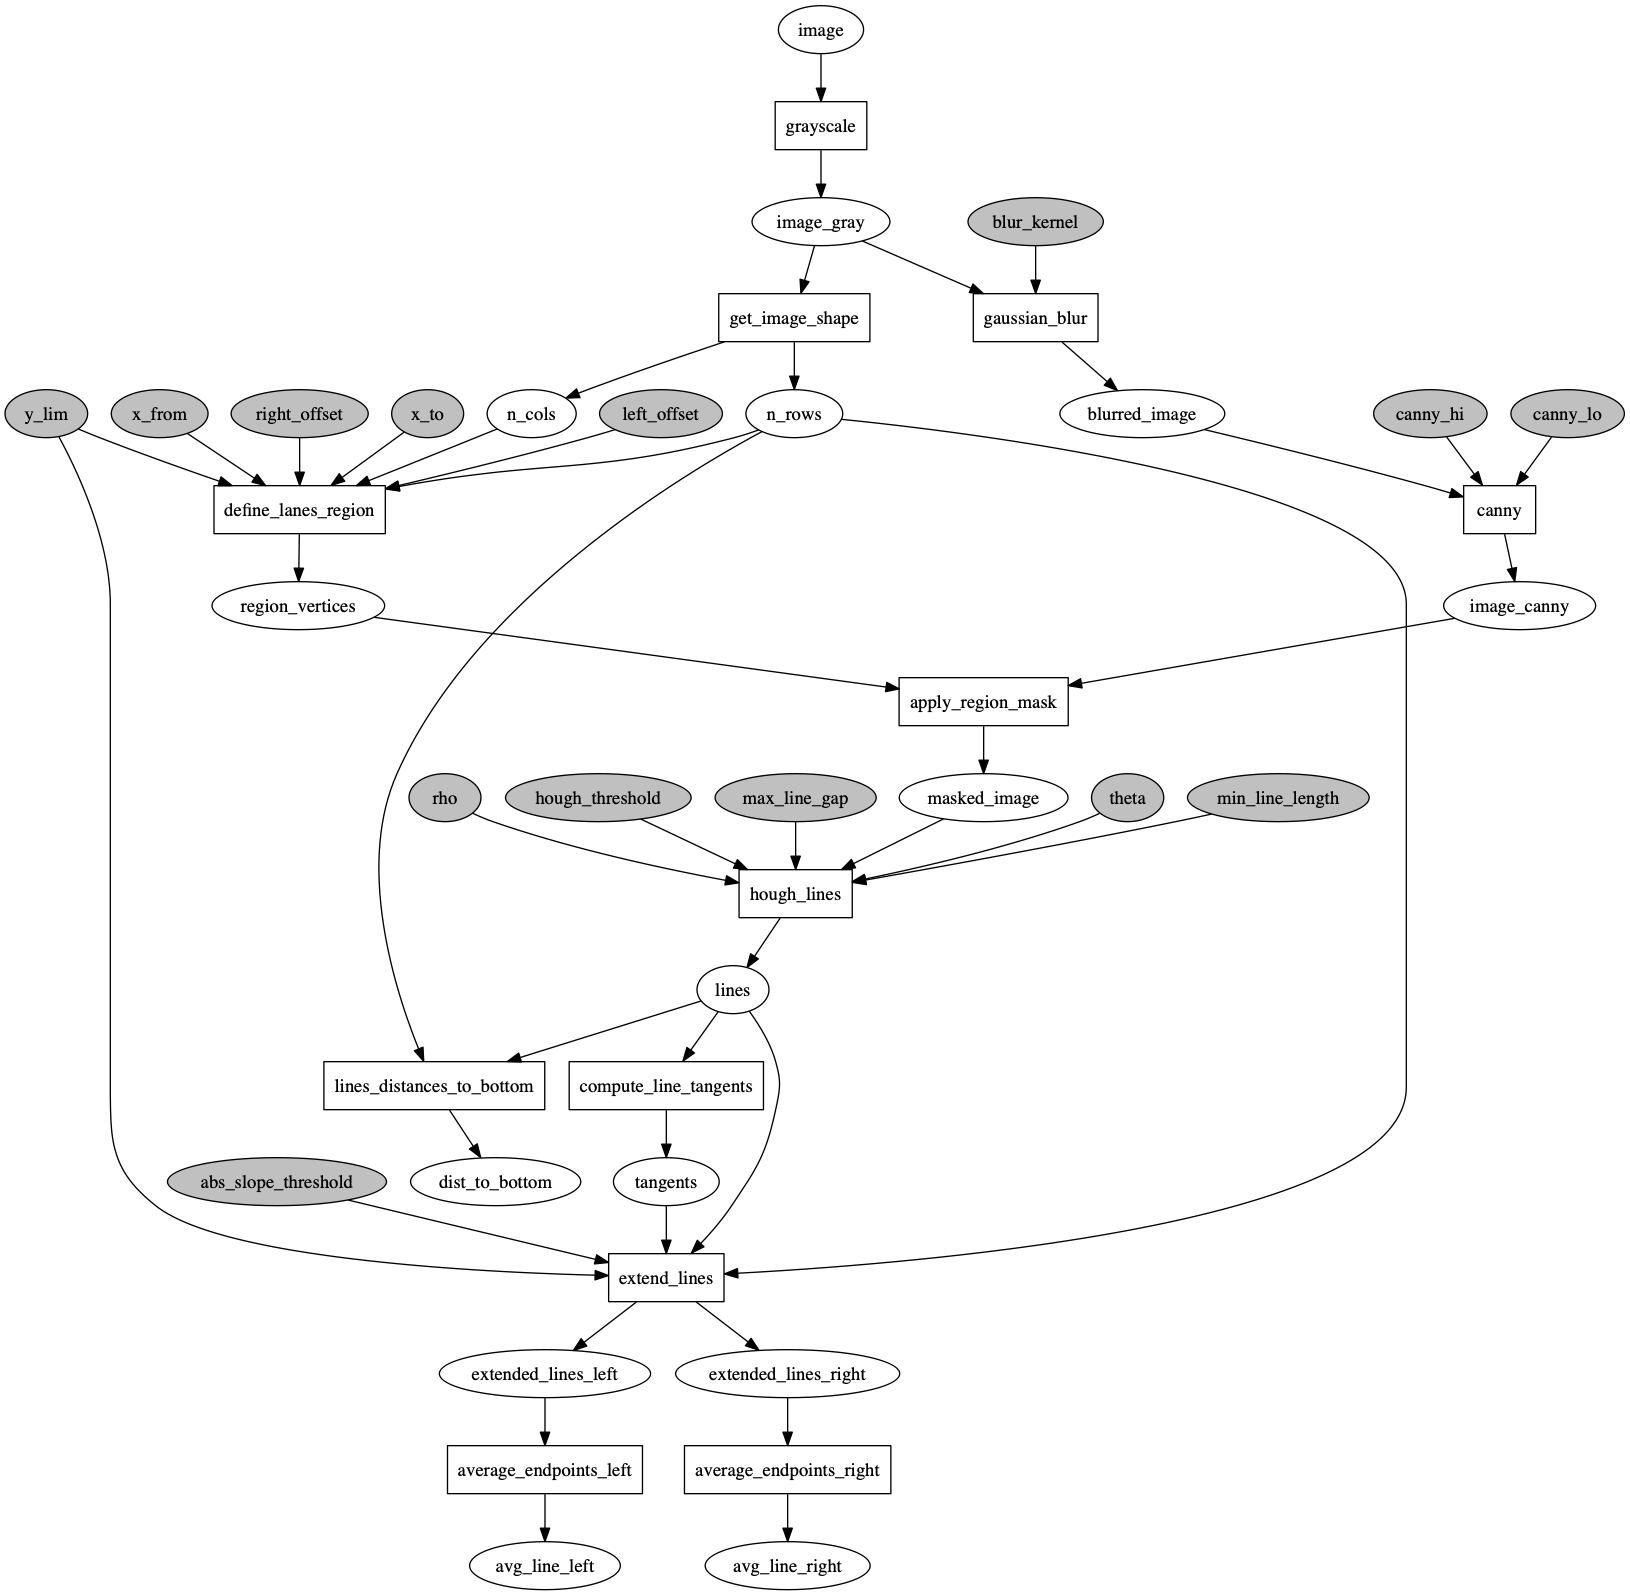

In [7]:
runner = CompGraphRunner(cg, frozen_tokens=lanespipeline.parameters)
nxpd.draw(runner.to_networkx())

In [8]:
runner.run(image=image)

lines = runner.token_value('lines')
tans = runner.token_value('tangents')

avg_line_left = runner.token_value('avg_line_left')
avg_line_right = runner.token_value('avg_line_right')

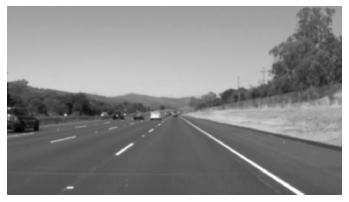

In [9]:
_ = plt.imshow(runner['blurred_image'], cmap='gray')
_ = plt.axis('off')

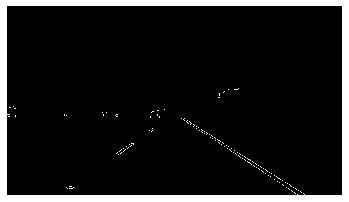

In [10]:
_ = plt.imshow(runner['image_canny'], cmap='gray')
_ = plt.axis('off')

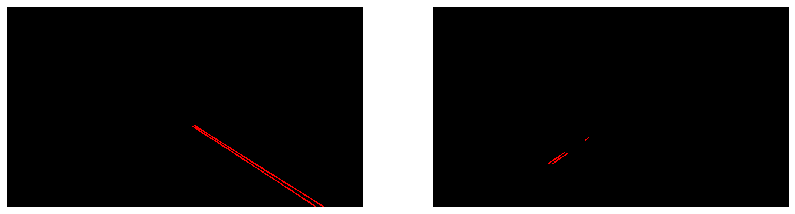

In [11]:
canvas_1 = np.zeros_like(image)
draw_lines_on_image(canvas_1, lines[tans > 0])

canvas_2 = np.zeros_like(image)
draw_lines_on_image(canvas_2, lines[tans < 0])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(canvas_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canvas_2)
_ = plt.axis('off')

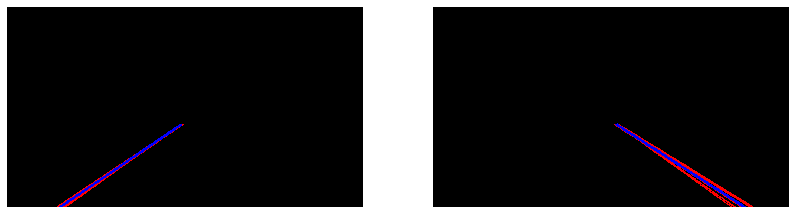

In [12]:
canvas_1 = np.zeros_like(image)
draw_lines_on_image(canvas_1, runner.token_value('extended_lines_left'))
draw_line(canvas_1, runner['avg_line_left'], color=[0, 0, 255], thickness=5)

canvas_2 = np.zeros_like(image)
draw_lines_on_image(canvas_2, runner.token_value('extended_lines_right'))
draw_line(canvas_2, runner['avg_line_right'], color=[0, 0, 255], thickness=5)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(canvas_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canvas_2)
_ = plt.axis('off')

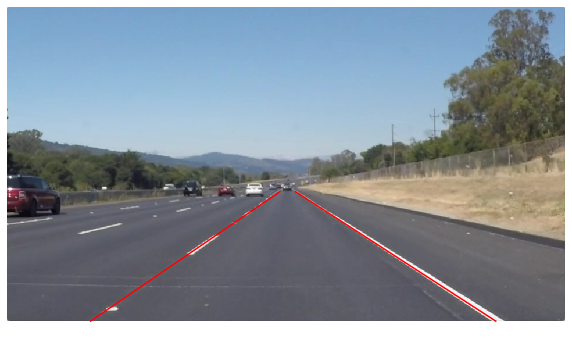

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(image)
plot_line(avg_line_left, color='r')
plot_line(avg_line_right, color='r')
_ = plt.axis('off')